In [16]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, LSTM, Bidirectional
from keras import losses



import numpy as np
import pandas as pd
import random
from src.utils import preprocess, feature_engineering
random.seed(7)

In [2]:
feature_engineering

<function src.utils.feature_engineering>

In [3]:
# Open files
Data_X_train = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Data_Y_train = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')

In [4]:
Data_X_train = feature_engineering(Data_X_train)

100%|██████████| 1440/1440 [04:24<00:00,  5.44it/s] 


In [5]:
X_train = Data_X_train.as_matrix()[:, 1:]
Y_train = Data_Y_train.as_matrix()[:, 1:]

In [7]:
del Data_X_train, Data_Y_train

In [9]:
X_train.shape, 23040/1440

((12576, 23040), 16.0)

In [10]:
X_train_cnn = X_train.reshape((len(X_train), 16, 1440, 1), order = 'F')
Y_train_cnn = np_utils.to_categorical(Y_train, 2)

In [14]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (16, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (16, 10),
                 strides = (1, 5),
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 16, 1440, 1)       64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 287, 16)        2576      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 287, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4592)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                229650    
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total para

In [15]:
conv_model.fit(X_train_cnn, Y_train_cnn, 
               validation_split = 0.15,
               epochs = 200, batch_size = 32, verbose = True)

Train on 10689 samples, validate on 1887 samples
Epoch 1/200
10689/10689 [==============================] - 12s 1ms/step - loss: 0.6048 - acc: 0.6825 - val_loss: 0.5774 - val_acc: 0.6969
Epoch 2/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5752 - acc: 0.7049 - val_loss: 0.5612 - val_acc: 0.6963
Epoch 3/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5703 - acc: 0.7028 - val_loss: 0.5575 - val_acc: 0.7054
Epoch 4/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5723 - acc: 0.7080 - val_loss: 0.5679 - val_acc: 0.7160
Epoch 5/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5693 - acc: 0.7079 - val_loss: 0.5590 - val_acc: 0.7181
Epoch 6/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5632 - acc: 0.7122 - val_loss: 0.5522 - val_acc: 0.7175
Epoch 7/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5654 - acc: 0.7142 - val_loss: 0.5534 - v

10689/10689 [==============================] - 11s 1ms/step - loss: 0.5396 - acc: 0.7262 - val_loss: 0.5495 - val_acc: 0.7186
Epoch 60/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5410 - acc: 0.7265 - val_loss: 0.5524 - val_acc: 0.7101
Epoch 61/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5443 - acc: 0.7221 - val_loss: 0.5511 - val_acc: 0.7154
Epoch 62/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5379 - acc: 0.7278 - val_loss: 0.5551 - val_acc: 0.7154
Epoch 63/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5347 - acc: 0.7278 - val_loss: 0.5555 - val_acc: 0.7154
Epoch 64/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5436 - acc: 0.7246 - val_loss: 0.5558 - val_acc: 0.7064
Epoch 65/200
10689/10689 [==============================] - 11s 1ms/step - loss: 0.5424 - acc: 0.7226 - val_loss: 0.5579 - val_acc: 0.7107
Epoch 66/200
10689/10689 [==============

KeyboardInterrupt: 

In [57]:
X_train_lstm = X_train.reshape((len(X_train), 16, 10, -1), order = 'F')
X_train_lstm = X_train_lstm.mean(axis = 2)

In [34]:
lstm_model = Sequential()
lstm_model.add(LSTM(150, recurrent_dropout = 0.2, input_shape = (16,144)))
lstm_model.add(Dropout(0.75))
lstm_model.add(Dense(units = 75, activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units = 2, 
                activation='softmax'))
lstm_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 150)               177000    
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 75)                11325     
_________________________________________________________________
dropout_20 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 152       
Total params: 188,477
Trainable params: 188,477
Non-trainable params: 0
_________________________________________________________________


In [35]:
lstm_model.fit(X_train_lstm, Y_train_cnn, 
               validation_split = 0.15,
               epochs = 20, batch_size = 64, verbose = True)

Train on 10689 samples, validate on 1887 samples
Epoch 1/20
10689/10689 [==============================] - 5s 422us/step - loss: 0.6781 - acc: 0.5964 - val_loss: 0.6478 - val_acc: 0.6444
Epoch 2/20
10689/10689 [==============================] - 3s 311us/step - loss: 0.6457 - acc: 0.6283 - val_loss: 0.6337 - val_acc: 0.6603
Epoch 3/20
10689/10689 [==============================] - 3s 316us/step - loss: 0.6361 - acc: 0.6416 - val_loss: 0.6255 - val_acc: 0.6566
Epoch 4/20
10689/10689 [==============================] - 3s 308us/step - loss: 0.6240 - acc: 0.6553 - val_loss: 0.6182 - val_acc: 0.6831
Epoch 5/20
10689/10689 [==============================] - 3s 310us/step - loss: 0.6128 - acc: 0.6700 - val_loss: 0.6100 - val_acc: 0.6751
Epoch 6/20
10689/10689 [==============================] - 3s 315us/step - loss: 0.6042 - acc: 0.6875 - val_loss: 0.6038 - val_acc: 0.6789
Epoch 7/20
10689/10689 [==============================] - 3s 314us/step - loss: 0.5956 - acc: 0.6907 - val_loss: 0.5909 - v

In [27]:
X_train_lstm.shape

(12576, 16, 144)

In [62]:
from keras import backend as K
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)



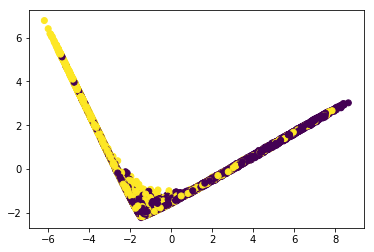

In [45]:
extract_cnn_features = K.function([lstm_model.layers[0].input, K.learning_phase()],
                                  [lstm_model.layers[2].output])
X_train_features = extract_cnn_features([X_train_lstm, 0])[0]
X_train_features[0,:]

proj = PCA(n_components = 2)
X_proj = proj.fit_transform(X_train_features)

plt.scatter(X_proj[:,0], X_proj[:,1], c= Y_train.flatten())

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier


parameters = {'n_estimators': 200, 'max_depth': None, 'max_features': 15, 
               'min_samples_split': 15, 'min_samples_leaf': 2, 'bootstrap': True, 
               'oob_score': True, 'criterion': 'entropy'}



In [53]:
clf = LogisticRegression()
cross_val_score(clf, X_train_features, Y_train.flatten(), cv= 5)

array([0.77225755, 0.77742448, 0.77256461, 0.77415507, 0.71320605])

In [73]:
def kfold_print(skf_splitter, X, Y, create_model_func, epochs, batch_size, verbose, last_layer):
    accs_train_svm = []
    accs_val_svm = []
    
    accs_train_lgr = []
    accs_val_lgr = []
    
    accs_train_xgb = []
    accs_val_xgb = []
    
    for train, val in skf.split(X, Y):
        model = create_model_func()
        Y_train = np_utils.to_categorical(Y[train], 2)
        Y_val = np_utils.to_categorical(Y[val], 2)
        model.fit(X[train], Y_train, epochs = epochs, batch_size = batch_size, verbose = verbose)

        
        extract_cnn_features = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[last_layer].output])
        X_features = extract_cnn_features([X, 0])[0]
        
        
        clf = SVC(kernel = 'rbf')
        clf.fit(X_features[train], Y[train].flatten())
        acc_train = clf.score(X_features[train], Y[train].flatten())
        accs_train_svm.append(acc_train)
        acc_val = clf.score(X_features[val], Y[val].flatten())
        accs_val_svm.append(acc_val)
        print('Training SVM: {0:.2f} - {1:.2f}'.format(100*acc_train, 100*acc_val))
        
        clf = LogisticRegression()
        clf.fit(X_features[train], Y[train].flatten())
        acc_train = clf.score(X_features[train], Y[train].flatten())
        accs_train_lgr.append(acc_train)
        acc_val = clf.score(X_features[val], Y[val].flatten())
        accs_val_lgr.append(acc_val)
        print('Training LGR: {0:.2f} - {1:.2f}'.format(100*acc_train, 100*acc_val))
        
#         clf = XGBClassifier(n_estimators = 100, 
#                             max_depth = 3, 
#                             min_child_weight = 5,
#                             subsample = 0.7, 
#                             colsample_bytree = 0.7, 
#                             silent = True)
        clf = RandomForestClassifier(**parameters)
        clf.fit(X_features[train], Y[train].flatten())
        acc_train = clf.score(X_features[train], Y[train].flatten())
        accs_train_xgb.append(acc_train)
        acc_val = clf.score(X_features[val], Y[val].flatten())
        accs_val_xgb.append(acc_val)
        print('Training XGBoost: {0:.2f} - {1:.2f}'.format(100*acc_train, 100*acc_val))

        
    print('SVM')
    print('--- Mean cv train score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_train_svm), 
                                                                  100*np.std(accs_train_svm)))
    print('--- Mean cv val score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_val_svm), 
                                                                  100*np.std(accs_val_svm)))
    
    print('LGR')
    print('--- Mean cv train score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_train_lgr), 
                                                                  100*np.std(accs_train_lgr)))
    print('--- Mean cv val score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_val_lgr), 
                                                                  100*np.std(accs_val_lgr)))
    
    print('XGBoost')
    print('--- Mean cv train score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_train_xgb), 
                                                                  100*np.std(accs_train_xgb)))
    print('--- Mean cv val score: {0:.2f}% +/- {1:.2f}%'.format(100*np.mean(accs_val_xgb), 
                                                                  100*np.std(accs_val_xgb)))

In [74]:
def create_model():
    lstm_model = Sequential()
    lstm_model.add(Bidirectional(LSTM(150, recurrent_dropout = 0.25), input_shape = (16,144)))
    lstm_model.add(Dropout(0.75))
    lstm_model.add(Dense(units = 100, activation = 'relu'))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(units = 2, 
                    activation='softmax'))
    lstm_model.compile(loss = losses.categorical_crossentropy,
                         optimizer = 'adam',
                         metrics = ['accuracy'])
    return lstm_model

kfold_print(skf, X_train_lstm, Y_train, create_model, 30, 64, True, 2)

Epoch 1/30
10060/10060 [==============================] - 8s 760us/step - loss: 0.6515 - acc: 0.6565
Epoch 2/30
10060/10060 [==============================] - 5s 474us/step - loss: 0.6038 - acc: 0.6922
Epoch 3/30
10060/10060 [==============================] - 5s 477us/step - loss: 0.5925 - acc: 0.6995
Epoch 4/30
10060/10060 [==============================] - 5s 477us/step - loss: 0.5893 - acc: 0.7035
Epoch 5/30
10060/10060 [==============================] - 5s 477us/step - loss: 0.5841 - acc: 0.7070
Epoch 6/30
10060/10060 [==============================] - 5s 477us/step - loss: 0.5730 - acc: 0.7132
Epoch 7/30
10060/10060 [==============================] - 5s 478us/step - loss: 0.5774 - acc: 0.7094
Epoch 8/30
10060/10060 [==============================] - 5s 475us/step - loss: 0.5809 - acc: 0.7091
Epoch 9/30
10060/10060 [==============================] - 5s 476us/step - loss: 0.5757 - acc: 0.7118
Epoch 10/30
10060/10060 [==============================] - 5s 478us/step - loss: 0.5757 - a

10061/10061 [==============================] - 5s 475us/step - loss: 0.5599 - acc: 0.7252
Epoch 20/30
10061/10061 [==============================] - 5s 473us/step - loss: 0.5561 - acc: 0.7230
Epoch 21/30
10061/10061 [==============================] - 5s 472us/step - loss: 0.5609 - acc: 0.7228
Epoch 22/30
10061/10061 [==============================] - 5s 469us/step - loss: 0.5535 - acc: 0.7267
Epoch 23/30
10061/10061 [==============================] - 5s 469us/step - loss: 0.5510 - acc: 0.7253
Epoch 24/30
10061/10061 [==============================] - 5s 470us/step - loss: 0.5518 - acc: 0.7267
Epoch 25/30
10061/10061 [==============================] - 5s 473us/step - loss: 0.5545 - acc: 0.7247
Epoch 26/30
10061/10061 [==============================] - 5s 471us/step - loss: 0.5480 - acc: 0.7257
Epoch 27/30
10061/10061 [==============================] - 5s 472us/step - loss: 0.5479 - acc: 0.7294
Epoch 28/30
10061/10061 [==============================] - 5s 472us/step - loss: 0.5440 - acc: